# Thomas Schelling's Model of Segregation

### Introduction

In his [1971 paper](https://www.stat.berkeley.edu/~aldous/157/Papers/Schelling_Seg_Models.pdf), Schelling suggested how two groups of people - e.g. whites and blacks - might self-segregate if individuals prefer not to be in a small minority. The running example he uses in his paper is of individuals in a neighborhood, but the ideas can be extended to other contexts like seating in a conference room or membership in a club. 

This is the main idea. Imagine a large grid of houses. Some will be vacant, some inhabited by whites, and some by blacks. Also suppose that no one wants to be in a minority too small, to the extent that they will be willing to move if their neighborhood doesn't have enough members of the same race. Also suppose that the order in which families move and the locations to which they move are random (with the stipulation that no one will move to a neighborhood that they would then want to move out of). 

Although Schelling drew out his model using pencil and paper and used coins and dice to simulate changes over time, we can now represent the model with a program. The first section of code below shows the initial conditions. These include:
 - how large the housing grid is
 - what proportion of the grid will be vacant, white, or black
 - how tolerant individuals in the community are
 - how large the community defines a neighborhood to be
 - how many moves we'll execute the algorithm for. 

In [8]:
import numpy as np
import matplotlib
from matplotlib import pyplot

BoardLatitude = 20 
BoardLongitude = 20
PortionEmpty = 0.25
PortionWhite = 0.5
PortionBlack = 1 - PortionEmpty - PortionWhite

Board = np.random.choice(a=[0,1,2], 
                         size=(BoardLatitude, BoardLongitude), 
                         replace=True, 
                         p=(PortionEmpty, PortionWhite, PortionBlack))

print(Board)

tolerance = 0.25 #Lowest fraction of one's neighbors one needs to be of the same race before one moves
radius = 1 #Number of squares in each direction to consider as one's neighborhood
iterations = 100 #Number of individual cells to move

[[0 0 1 2 2 0 2 1 1 1 0 1 1 1 1 0 2 1 1 0]
 [2 0 1 2 2 1 0 1 2 1 2 1 1 1 0 0 0 1 1 1]
 [0 0 2 2 1 1 2 1 0 2 1 2 0 1 1 2 0 1 0 0]
 [0 0 1 2 1 1 1 1 2 0 0 2 1 2 1 0 1 0 1 1]
 [1 1 1 0 2 2 1 1 1 0 1 1 1 2 2 1 0 1 1 1]
 [0 1 1 1 1 1 1 1 2 2 2 1 1 2 1 0 1 0 0 1]
 [1 2 0 2 2 1 0 0 0 1 1 1 1 1 0 1 0 2 1 2]
 [1 0 2 2 1 1 1 0 0 0 0 0 1 2 2 2 1 1 1 1]
 [1 1 1 1 2 0 1 0 2 1 0 2 2 1 2 0 2 1 2 1]
 [2 2 0 2 1 0 1 1 1 2 1 0 0 1 1 2 2 1 0 1]
 [1 1 2 0 1 1 2 1 1 0 1 1 0 1 2 0 1 2 2 0]
 [2 1 0 0 2 1 1 1 0 1 1 0 2 2 2 0 1 1 0 1]
 [1 1 1 1 2 0 1 2 1 1 1 2 1 2 0 0 1 2 0 1]
 [2 1 2 1 2 2 2 0 2 0 1 0 2 1 2 1 2 2 1 2]
 [1 2 2 2 0 0 1 1 1 2 2 0 0 1 2 0 1 2 0 1]
 [1 1 1 0 2 1 0 0 1 2 2 1 0 1 0 0 1 1 0 1]
 [1 0 1 1 1 1 0 1 0 1 2 2 1 1 1 1 1 0 1 2]
 [1 0 2 1 1 2 0 2 0 2 0 2 1 1 1 1 1 1 1 1]
 [0 0 0 2 0 1 1 2 1 0 2 1 2 1 0 1 2 0 0 1]
 [2 0 0 1 2 2 0 0 0 1 1 2 2 1 2 2 0 2 0 1]]


The grid above (```Board```) shows our initial arrangement of families: 0's represent vacancies, 1's represent whites, and 2's represent blacks. 

The function below accepts an array as its sole argument. It returns an array containing the location of each vacancy in the grid. 

In [9]:
def vacancies(Board):
    vacancyList = np.where(Board == 0)
    return(vacancyList)
vacancies(Board)

(array([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
         2,  3,  3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,
         6,  6,  6,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  9,  9,  9,  9,
         9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 13,
        13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16,
        16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19,
        19, 19, 19, 19], dtype=int64),
 array([ 0,  1,  5, 10, 15, 19,  1,  6, 14, 15, 16,  0,  1,  8, 12, 16, 18,
        19,  0,  1,  9, 10, 15, 17,  3,  9, 16,  0, 15, 17, 18,  2,  6,  7,
         8, 14, 16,  1,  7,  8,  9, 10, 11,  5,  7, 10, 15,  2,  5, 11, 12,
        18,  3,  9, 12, 15, 19,  2,  3,  8, 11, 15, 18,  5, 14, 15, 18,  7,
         9, 11,  4,  5, 11, 12, 15, 18,  3,  6,  7, 12, 14, 15, 18,  1,  6,
         8, 17,  1,  6,  8, 10,  0,  1,  2,  4,  9, 14, 17, 18,  1,  2,  6,
         7,  8, 16, 18], dtype=int64))

### Movement Rules

To model how people move over time, we'll need a few functions: ```moveFrom```, ```moveTo```, and ```move```. The first accepts a position on the grid and determines if the family living there would want to move based on the racial composition of their neighbors. The second function, ```moveTo```, accepts a new location and determines if that location would be a suitable place to move for a family of a given race. The final function, ```move```, uses ```moveTo``` to find somewhere for a family to move and then updates the ```Board``` and list of vacancies to record that the move has occurred. 

In [10]:
#Counts the number of neighbors of a cell of the same race 
#as the cell and determines whether or not the cell will move. 
def moveFrom(latitude, longitude):
    #Set at -1 to offset counting the cell itself
    sameRace = -1
    numNeighbors = -1
    
    for i in range(latitude-radius, latitude+radius+1):
        for j in range(longitude-radius, longitude+radius+1):
            
            #Handle edge cases
            if i<0 or j<0 or i>BoardLatitude-1 or j>BoardLongitude-1:
                sameRace = sameRace
            else:
                numNeighbors = numNeighbors+1
                if Board[i,j] == Board[latitude, longitude]:
                    sameRace = sameRace+1
    
    if sameRace/numNeighbors < tolerance:
        return True
    else:
        return False    

In [11]:
#Nearly identical to moveFrom but indicates whether it is 
#acceptable to move to the given cell
def moveTo(latitude, longitude, race):
    #In this case we don't have to worry about counting the cell itself 
    #in sameRace since we'll only be using this function on vacant cells.
    sameRace = 0
    numNeighbors = -1
    
    for i in range(latitude-radius, latitude+radius+1):
        for j in range(longitude-radius, longitude+radius+1):
            
            #Handle edge cases
            if i<0 or j<0 or i>BoardLatitude-1 or j>BoardLongitude-1:
                sameRace = sameRace
            else:
                numNeighbors = numNeighbors+1
                if Board[i,j] == race:
                    sameRace = sameRace+1
    
    if sameRace/numNeighbors < tolerance:
        return False
    else:
        return True

In [12]:
#Takes the coordinates of a cell & determines if it needs to move.
#If so, finds a suitable location and updates the Board and vacancyList
#to reflect the move.
#If not, returns False. 
def move(latitude, longitude):
    vacancyList = vacancies(Board)
    while True:
        #randomly pick a vacancy to potentially move to
        pick = np.random.choice(len(vacancyList[0]), size=1)
        #vacancyList has all the x-coords in its 0th entry
        #and all the y-coords in its 1st entry
        candidate = (vacancyList[0][pick], vacancyList[1][pick])
            
        #check if vacancy has sufficiently many same-race neighbors
        if moveTo(candidate[0][0], candidate[1][0], Board[latitude, longitude]):
            #if so, modify Board to show move and vacancy in old cell
            Board[candidate[0], candidate[1]] = Board[latitude, longitude]
            Board[latitude, longitude] = 0
            break 

### Visualizations 

Once run the algorithm, we'll want see what's happening. The function ```illustrate``` converts ```Board``` into a colormap so that it's easier to see where people have moved over time. Perhaps later we'll also look at some stats, like the median number of neighbors of the same race or percentage of the population with no neighbors of the opposite race. 

In [13]:
def illustrate(Board):
    # make a color map of fixed colors
    cmap = matplotlib.colors.ListedColormap(['white','yellow','brown'])
    bounds=[-0.5, 0.5, 1.5, 2.5]
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

    # tell imshow about color map so that only set colors are used
    img = pyplot.imshow(Board,interpolation='nearest',
                        cmap = cmap, norm=norm)

    pyplot.show()

### The Algorithm

Finally, we're ready to run the algorithm itself. What will happen? Only ```time``` will tell. 

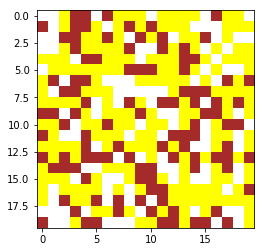

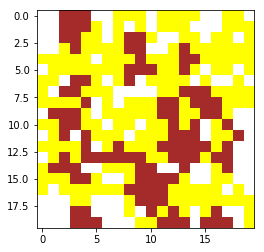

In [14]:
def time(iterations):
    illustrate(Board)
    while iterations > 0:
        latitude = np.random.choice(BoardLatitude, size=1)[0]
        longitude = np.random.choice(BoardLongitude, size=1)[0]
        if moveFrom(latitude, longitude):
            move(latitude, longitude)
            iterations = iterations-1
    
    illustrate(Board)
time(1000)

### Conclusion and Further Work

The two plots above show the initial distribution of race (white represents vacancies; yellow and brown are the two races) and the distribution after the algorithm has run. Clearly the result is a much more segregated population. 

There are a variety of limitations to this model, but there are also numerous ways to extend it. Some of the limitations:
 - Not everyone wants to or can move when surrounded by members of another race; race is correlated with income.
 - There is no accounting for immigration, emigration, or deaths. 
 - The grid model doesn't accurately reflect real geography - it would be better to include some squares that are uninhabitable.
 - The model doesn't include the effects of social ties which might pull a family into or out of a neighborhood. The presence of good schools and jobs are relevant here. 

Perhaps in a later post I'll work on expanding the model to address one of these limitations; I might also investigate what the 4000+ papers citing Schelling's work have done. 